#  Часть 2. Работа с геоданными.

Использовалась замечательная библиотека folium, и утилита cutycapt.

##### Требуемая структура каталогов

## 2.1. Загрузка данных, нулевые ячейки.

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
dir_with_count_data = os.path.join(os.path.dirname(os.path.abspath('file')), 'count_data')
files_with_count_data = os.listdir(dir_with_count_data)
files_with_count_data.sort()
files_with_count_data

['count_cleaned_yellow_tripdata_2016-05.csv']

Рассматриваем май 2016г.

In [3]:
file = os.path.join(dir_with_count_data, 'count_cleaned_yellow_tripdata_2016-05.csv')
file

'/home/artem/data_science/yandex_data/course_6/TAXI/week_2/2_GEO_folium/count_data/count_cleaned_yellow_tripdata_2016-05.csv'

In [4]:
data = pd.read_csv(file, sep=',', header=0, index_col=0)
data.shape

(2500, 749)

In [5]:
data.head()

,region,west,east,south,north,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
0,1,-74.25559,-74.244478,40.496120,40.504508,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-74.25559,-74.244478,40.504508,40.512896,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-74.25559,-74.244478,40.512896,40.521285,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,-74.25559,-74.244478,40.521285,40.529673,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,-74.25559,-74.244478,40.529673,40.538061,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Считаем нулевые зоны

In [6]:
num_of_zones = data.shape[0]
num_of_zeros_zones = 0
drop_indexes = [] # Список ненужных строк
trips = np.array(data.iloc[:, 5:])
for i in range(trips.shape[0]):
    if trips[i].sum() == 0:
        num_of_zeros_zones += 1
        drop_indexes.append(i)
data.drop(index=drop_indexes, inplace=True)
print('Всего {} зон. Количество зон без поездок за май 2016г - {}.'.format(num_of_zones, num_of_zeros_zones))

Всего 2500 зон. Количество зон без поездок за май 2016г - 1283.


## 2.2. Статическая карта. Empire State Building.

In [7]:
import folium
from colour import Color
from matplotlib import pyplot as plt
from matplotlib import image as pltimg
import os

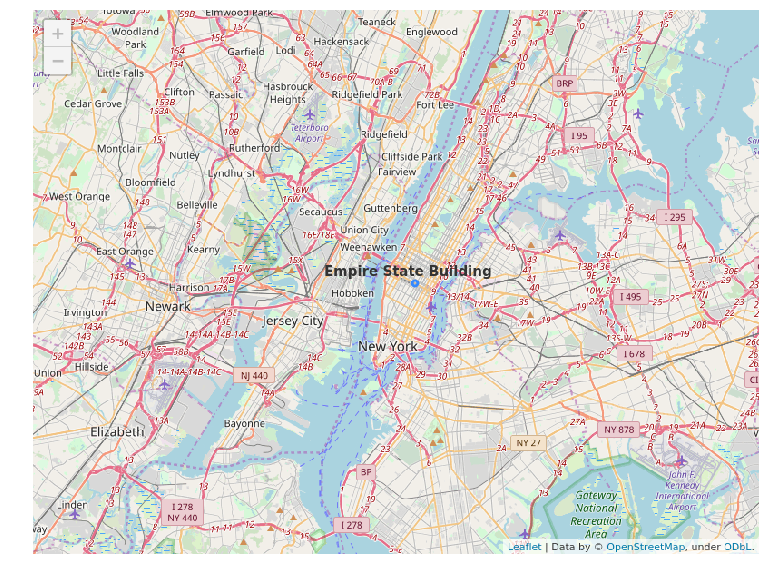

In [8]:
# Рисуем Empire State Building
empire_coordinates = [40.748817, -73.985428]
lat = empire_coordinates[0]
lon = empire_coordinates[1]
title = 'Empire State Building'
tooltip = 'OpenStreetMap'
m = folium.Map(location=[40.75, -74.00], 
               #width='80%', height='80%', 
               zoom_start=11, min_zoom =11, max_zoom=11, 
               png_enabled=False)
               #tiles = 'Mapbox Bright')
#folium.Marker(empire_coordinates, popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
folium.Circle([lat, lon], 150, fill=True).add_child(folium.Popup('Empire State Building')).add_to(m)
folium.map.Marker(
    [lat+0.003, lon],
    icon=folium.features.DivIcon(
        icon_size=(200,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 11pt"><b>%s</b></div>' % title,
        )
    ).add_to(m)
m.save('map_1.html')

# Сохраняем в png.
outdir = os.path.dirname(os.path.abspath('file'))
url = "file://{}/map_1.html".format(os.getcwd())
outfn = os.path.join(outdir,"map_1.png")
com = 'cutycapt --url={} --out={} --delay=1000 --plugins=on --javascript=on --js-can-access-clipboard=on --java=on'.format(url, outfn)
os.system(com)

# Печатаем.
plt.figure(figsize=(13, 13))
map_image = pltimg.imread('map_1.png')
plt.imshow(map_image)
plt.axis('off')
plt.show()

## 2.3. Статическая карта. Суммарное количество поезок.

In [9]:
# Суммарное количество поездок, координаты зон.
trips_data = np.array([i.sum() for i in np.array(data.iloc[:, 5:])])
coord_data = np.array(data.iloc[:, :5])

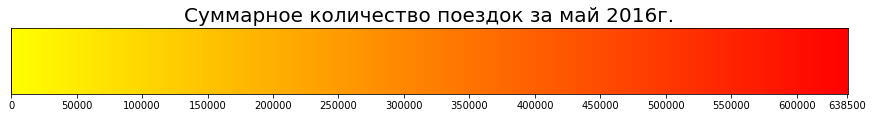

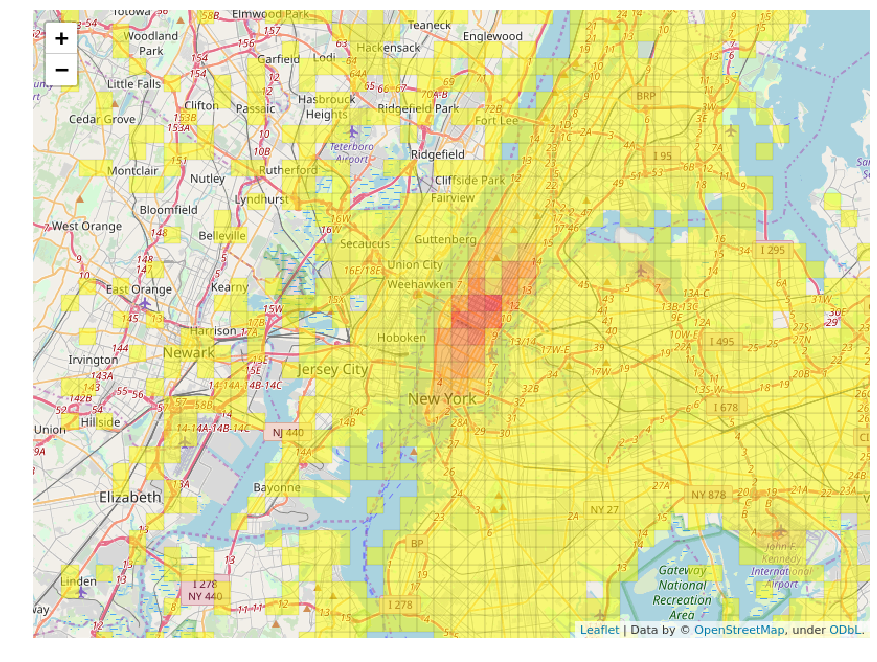

In [10]:
# Градиент.
color_1 = 'Yellow'
color_2 = 'Red'
color_1 = Color(color_1)
grad = list(color_1.range_to(Color(color_2), int(trips_data.max())))

# Colorbar.
plt.figure(figsize=(15, 1.5))
trips_values = list(range(0, int(trips_data.max())+1, 500))
colorbar = np.array([[tuple([int(round(j*255, 0)) for j in grad[int(i)-1].rgb]) for i in trips_values] for _ in range(100)])
plt.imshow(colorbar)
plt.yticks([])
ticks = list(range(len(trips_values)))
plt.xticks(ticks=ticks[::100] + [ticks[-1]], labels=trips_values[::100] + [trips_values[-1]])
plt.title('Суммарное количество поездок за май 2016г.', y=1.01, fontsize=20)
plt.show()

# Карта.
m = folium.Map(location=[40.75, -74.00], 
               #width='80%', height='80%', 
               zoom_start=11, 
               png_enabled=False)
               #tiles = 'Mapbox Bright')

# Рисуем суммарное количество поездок
features = []
for i in range(data.shape[0]):
    
    west = coord_data[i][1]
    east = coord_data[i][2]
    south = coord_data[i][3]
    north = coord_data[i][4]
    
    left_down = (south, west)
    left_up = (north, west)
    right_up = (north, east)
    right_down = (south, east)
    
    fillcolor = grad[int(trips_data[i]-1)].hex_l
    
    folium.vector_layers.Rectangle([left_down, left_up, right_up, right_down], 
                                   popup=None, tooltip=str(int(coord_data[i][0])), 
                                   fill=True, fill_color=fillcolor, fill_opacity = 0.5,
                                   stroke=True, color=Color('Black').hex_l, weight=1, opacity=0.1).add_to(m)

m.save('map_2.html')

# Сохраняем в png.
outdir = os.path.dirname(os.path.abspath('file'))
url = "file://{}/map_2.html".format(os.getcwd())
outfn = os.path.join(outdir,"map_2.png")
com = 'cutycapt --url={} --out={} --delay=1000 --plugins=on --javascript=on --js-can-access-clipboard=on --java=on'.format(url, outfn)
os.system(com)

# Печатаем.
plt.figure(figsize=(15, 15))
map_image = pltimg.imread('map_2.png')
plt.imshow(map_image)
plt.axis('off')
plt.show()

Видим ошибки геолокации.

## 2.4. Фильтрация ячеек.

Посмотрим на распределения

In [11]:
data = data.reset_index(drop=True)

In [12]:
data.head()

,region,west,east,south,north,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
0,15,-74.25559,-74.244478,40.613555,40.621943,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,-74.25559,-74.244478,40.621943,40.630331,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,-74.25559,-74.244478,40.697437,40.705825,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,-74.25559,-74.244478,40.714213,40.722601,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,-74.25559,-74.244478,40.756154,40.764542,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
distr_data = np.array(data.iloc[:, 5:])
cool_indexes = []
for i in range(distr_data.shape[0]):
    if distr_data[i].sum() > 100000:
        cool_indexes.append(i)

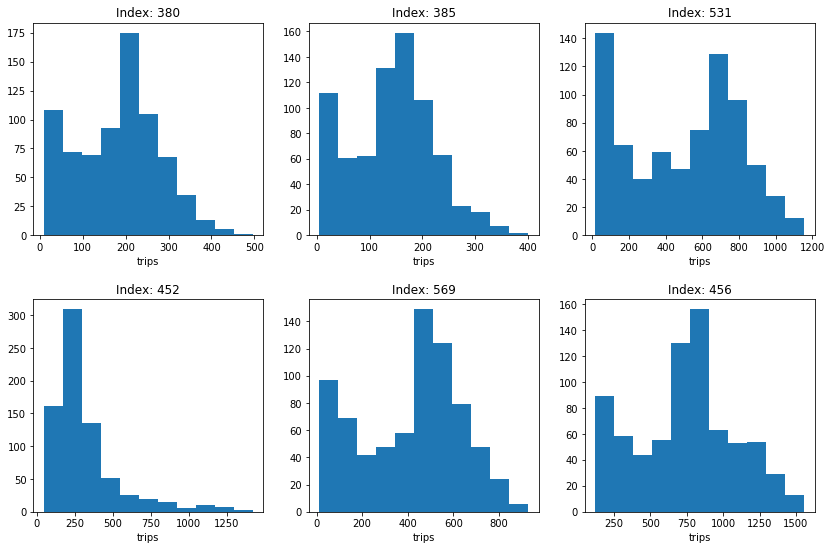

In [14]:
bins = int(round(1 + 3.322*np.log10(distr_data.shape[0])))

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14, 9))
plt.subplots_adjust(hspace=0.3)
for i in range(6):
    ax = axis[i//3, i%3]
    index = np.random.choice(cool_indexes)
    ax.hist(distr_data[index], bins)
    ax.set_title('Index: {}'.format(str(index)))
    ax.set_xlabel('trips')
plt.show()

In [15]:
drop_ids = []
for i in range(distr_data.shape[0]):
    arr = distr_data[i]
    if arr.mean() < 5:
        drop_ids.append(i)
data.drop(index=drop_ids, inplace=True, errors='ignore')
print('Количество ячеек со средним числом поездок меньшим пяти - {}'.format(str(len(drop_ids))))
print('Количество оставшихся ячеек - {}'.format(data.shape[0]))

Количество ячеек со средним числом поездок меньшим пяти - 1115
Количество оставшихся ячеек - 102


## 2.5. Динамическая карта. Статуя свободы. Файл map_3.html

In [16]:
# Рисуем статую свободы
liberty_coordinates = [40.689247, -74.044502]
lat = liberty_coordinates[0]
lon = liberty_coordinates[1]
title = 'Statue Of Liberty'
tooltip = 'OpenStreetMap'
m = folium.Map(location=[40.75, -74.00], 
               width='80%', height='80%', 
               zoom_start=11, min_zoom =11, max_zoom=11, 
               png_enabled=False)
               #tiles = 'Mapbox Bright')
#folium.Marker(empire_coordinates, popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
folium.Circle([lat, lon], 150, fill=True, color=Color('Yellow').hex_l).add_child(folium.Popup('Statue Of Liberty')).add_to(m)
folium.map.Marker(
    [lat-0.01, lon],
    icon=folium.features.DivIcon(
        icon_size=(120,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 11pt"><b>%s</b></div>' % title,
        )
    ).add_to(m)
m.save('map_3.html')

m

## 2.6. Динамическая карта. Среднее количество поездок. Файл map_4.html.

In [17]:
data = data.reset_index(drop=True)

In [18]:
data.head()

,region,west,east,south,north,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
0,1075,-74.022246,-74.011135,40.697437,40.705825,71.0,37.0,10.0,14.0,6.0,...,124.0,105.0,80.0,84.0,106.0,106.0,99.0,84.0,83.0,34.0
1,1076,-74.022246,-74.011135,40.705825,40.714213,64.0,39.0,46.0,25.0,20.0,...,214.0,208.0,156.0,202.0,213.0,167.0,166.0,173.0,98.0,77.0
2,1077,-74.022246,-74.011135,40.714213,40.722601,52.0,13.0,8.0,6.0,4.0,...,104.0,69.0,67.0,109.0,173.0,171.0,165.0,107.0,127.0,58.0
3,1125,-74.011135,-74.000023,40.697437,40.705825,81.0,38.0,34.0,23.0,22.0,...,96.0,70.0,68.0,109.0,126.0,88.0,65.0,78.0,94.0,53.0
4,1126,-74.011135,-74.000023,40.705825,40.714213,259.0,121.0,86.0,59.0,64.0,...,205.0,213.0,168.0,250.0,281.0,293.0,301.0,256.0,174.0,118.0


In [19]:
# Среднее количество поездок, координаты зон.
trips_data = np.array([i.mean() for i in np.array(data.iloc[:, 5:])])
coord_data = np.array(data.iloc[:, :5])

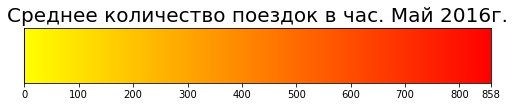

In [23]:
# Градиент.
color_1 = 'Yellow'
color_2 = 'Red'
color_1 = Color(color_1)
grad = list(color_1.range_to(Color(color_2), int(trips_data.max())))

# Colorbar.
plt.figure(figsize=(20, 1))#, dpi=120)
trips_values = list(range(0, int(trips_data.max())+1))
colorbar = np.array([[tuple([int(round(j*255, 0)) for j in grad[int(i)-1].rgb]) for i in trips_values] for _ in range(100)])
plt.imshow(colorbar)
plt.yticks([])
ticks = list(range(len(trips_values)))
plt.xticks(ticks=ticks[::100] + [ticks[-1]], labels=trips_values[::100] + [trips_values[-1]])
plt.title('Среднее количество поездок в час. Май 2016г.', y=1.01, fontsize=20)
plt.show()

# Карта.
m = folium.Map(location=[40.75, -73.9], 
               #width='80%', height='80%', 
               zoom_start=11, 
               png_enabled=False)
               #tiles = 'Mapbox Bright')

# Рисуем суммарное количество поездок
features = []
for i in range(data.shape[0]):
    
    west = coord_data[i][1]
    east = coord_data[i][2]
    south = coord_data[i][3]
    north = coord_data[i][4]
    
    left_down = (south, west)
    left_up = (north, west)
    right_up = (north, east)
    right_down = (south, east)
    
    fillcolor = grad[int(trips_data[i]-1)].hex_l
    
    folium.vector_layers.Rectangle([left_down, left_up, right_up, right_down], 
                                   popup=None, tooltip='region {}; trips {}'.format(int(coord_data[i][0]), int(trips_data[i]-1)), 
                                   fill=True, fill_color=fillcolor, fill_opacity = 0.5,
                                   stroke=True, color=Color('Black').hex_l, weight=1, opacity=0.1).add_to(m)

m.save('map_4.html')
m

Теперь все выглядит правдоподобно.